
$$
\Huge{ \text{ Gradient Descent}}
$$
$$
Binh ~ Tran
$$

# Gradient Descent

## Introduction

* In Machine Learning in particular and Optimizing Math in general, 
we often have **to find the smallest** (or sometimes largest) value of a function.

* In general, **finding the global minimum** of the loss functions in Machine Learning is **very complex,** even impossible.

* **Instead,** we try to **find local minimum** points and consider them to be the solution of the problem

* **Local minimum** points are the solution of the **derivative of equation 0**.

* However, in most cases, **solving equation of zero** derivatives is **impossible**.

** The most common approach is to derive is: **

* From a point we consider closer to the solution of the problem, 
then use a iterative operation to get to the point where the derivative is close to 0.


* Gradient Descent (in short GD) and its variants are one of the most used methods.

## Gradient Descent for function 1 variable

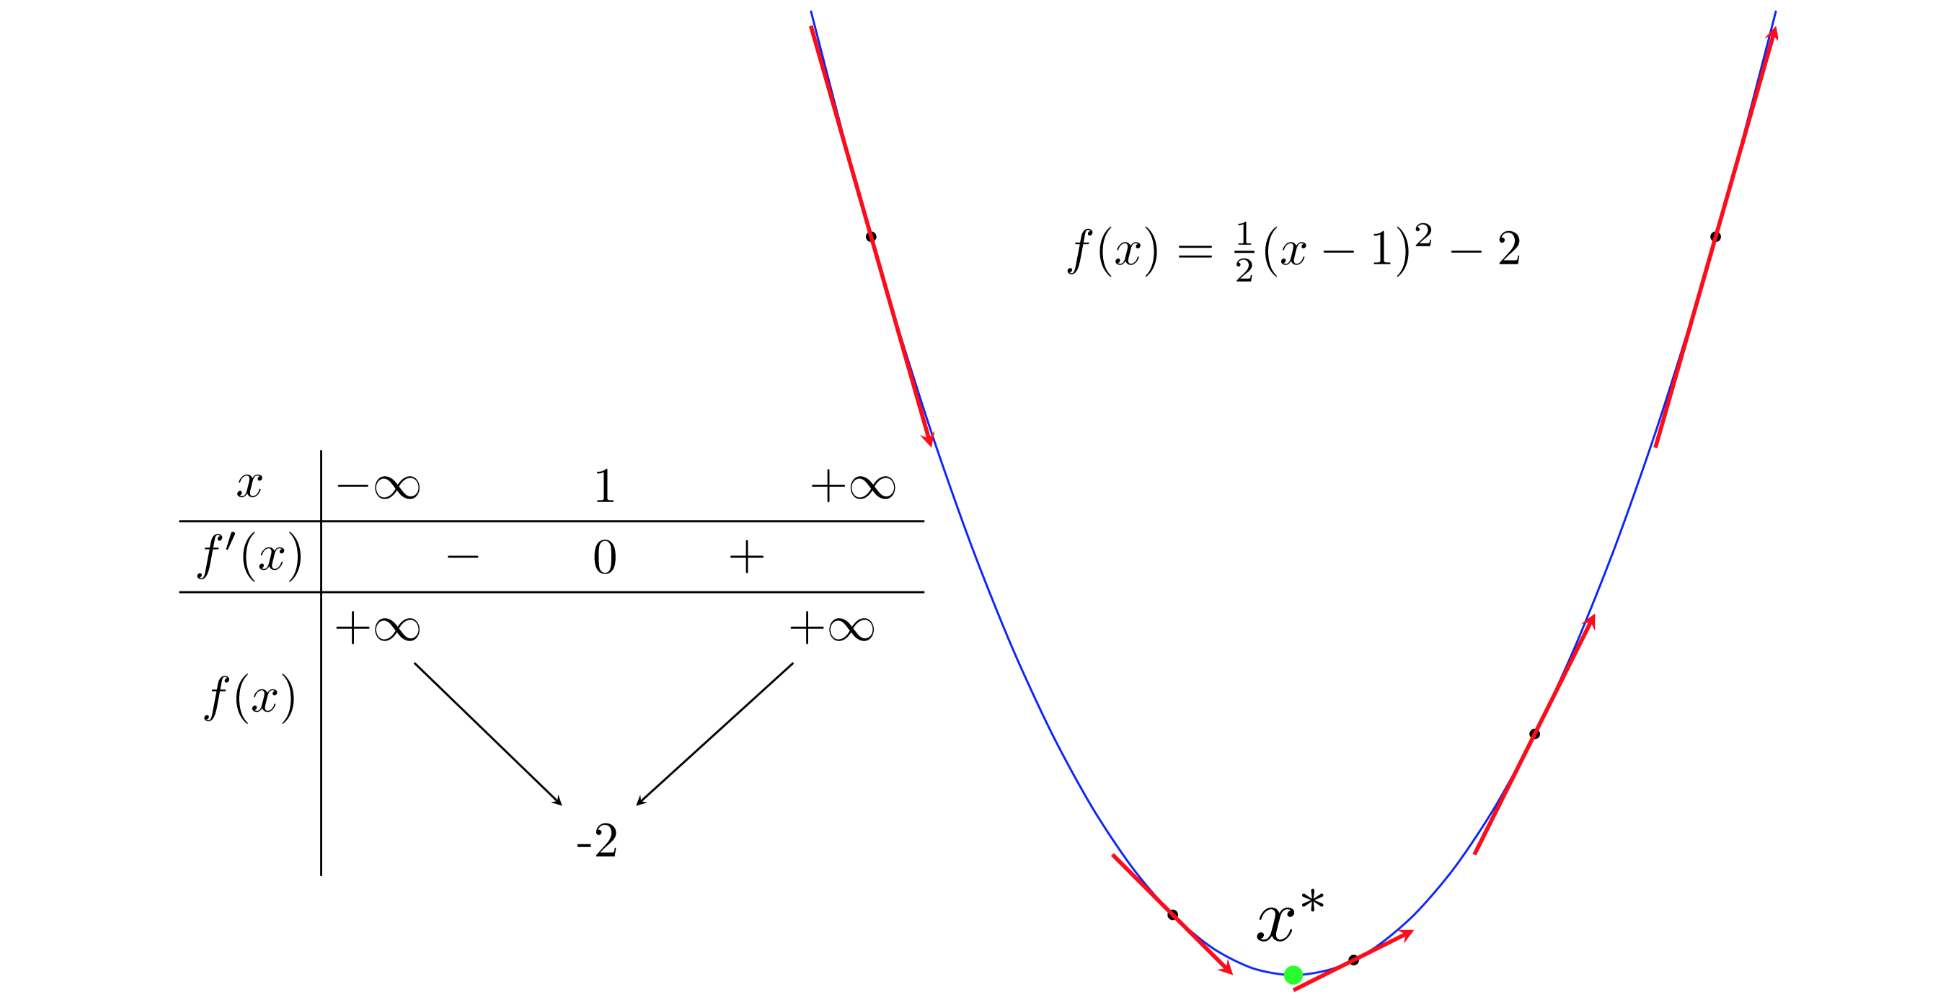

* Let $ y = f(x)$
* Assume $f$ is differentiable (means f have $f' ~ \forall x$)
  1. If $x^*$ is local minimum of $f(x)\Rightarrow$ 
     * $ f'(x^*) = 0 $
     * $ \forall x < x^* \Rightarrow f’(x) < 0 $
     * $ \forall x > x^* \Rightarrow f’(x) > 0 $

* 
$ \Rightarrow $
$ x_{t+1} = x_{t} - \eta f’(x_{t})$
* eta: $\eta > 0$ called **learning rate**

## Sample $f(x) = x^2 + 5\sin(x)$

In [1]:
import math
import numpy as np 
import matplotlib.pyplot as plt
import time
from IPython import display
%matplotlib inline


In [2]:
#
import matplotlib.pyplot as plt
import numpy as np
# plt.rcParams['font.sans-serif'].insert(0, 'Liberation Sans')
# plt.rcParams['font.sans-serif'].insert(0, 'Arial')
# plt.rcParams['font.family'] = 'sans-serif'

def f(x):
    return x**2 + 5*np.sin(x)
def plot_f():
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)

    x_left = -6; x_right = 6; y_bottom = -10; y_top = 40
    x = np.linspace(x_left, x_right, 7*4)

    ax.plot(x, f(x))
    ax.axis([x_left, x_right, y_bottom, y_top])
    plt.xlabel('x', fontname="Arial", fontsize=20)
    plt.title("$f(x) = x^2 + 5\sin(x)$", fontsize=30)
plot_f()    

$\Rightarrow f’(x) = 2x + 5\cos(x)$

$x_{t+1} = x_{t} - \eta(2x_{t} + 5\cos(x_{t}))$

```python
def f(x):
    return x**2 + 5*np.sin(x)

def f_grad(x):
    return 2*x + 5*np.cos(x)

def GD(eta, x0):
    N = 100
    x = [x0]
    eps = 1e-3
    for i in range(N):
        x_new = x[-1] - eta * f_grad(x[-1])
        if abs(f_grad(x_new)) < eps:
            break
        x.append(x_new)
    return (x, i)
```

In [1]:
def f(x):
    return x**2 + 10*np.sin(x)
def f_grad(x):
    return 2*x + 10*np.cos(x)
def GD(eta, x0, N = 100):
    x = [x0]
    eps = 1e-3
    for i in range(N):
        x_new = x[-1] - eta * f_grad(x[-1])
        if abs(f_grad(x_new)) < eps:
            break
        x.append(x_new)
    return (x, i)

```python
(x1, it1) = GD(.1, -5)
(x2, it2) = GD(.1, 5)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], f(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], f(x2[-1]), it2))
```

In [4]:
(x1, it1) = GD(.1, -5)
(x2, it2) = GD(.1, 5)
print('Solution x1 = %f, cost = %f, obtained after %d iterations'%(x1[-1], f_grad(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, obtained after %d iterations'%(x2[-1], f_grad(x2[-1]), it2))

Solution x1 = -1.306528, cost = -0.001024, obtained after 7 iterations
Solution x2 = 3.836788, cost = -0.005706, obtained after 4 iterations


```python
def GD_Graph(eta, x0):
    plt.clf();
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    #plt.ion()
    x_left = -6; x_right = 6; y_bottom = -10; y_top = 40
    x = np.linspace(x_left, x_right, 7*4)
    
    ax.plot(x, f(x))
    ax.axis([x_left, x_right, y_bottom, y_top])
    plt.xlabel('x', fontname="Arial", fontsize=20)
    plt.ylabel('y', fontname="Arial", fontsize=20)
    plt.title(r'$f(x) = x^2 + 5\sin(x)$ eta: %f ' %(eta), fontsize=20)
    
    # Alg
    N = 100
    x1 = [x0]
    eps = 1e-3
    
    # Alg
    for i in range(N):
        # Alg
        x_new = x1[-1] - eta * f_grad(x1[-1])
        ax.text(x_new, f(x_new), str(i) , style='italic', bbox={'facecolor':'yellow', 'alpha':0.9, 'pad':10})
        ax.plot(x_new, f(x_new), color='green', marker='o')
        ax.legend([r"$f(x) = x^2 + 5\sin(x)$"])
        
        plt.xlabel('iter: %d, x: %f, grad: %f' %(i, x_new, f_grad(x1[-1])))
        plt.ylabel('y: %f' %(f(x_new)))
        
        # Alg
        if abs(f_grad(x_new)) < eps:
            plt.xlabel('iter: %d, x: %f, grad: %f, eta: %f  --- STOP LOOP ---' %(i, x_new, f_grad(x1[-1]), eta))
            break
        # Alg
        x1.append(x_new)
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(.1)
    return (x1, i)
```

In [5]:
def f(x):
    return x**2 + 10*np.sin(x)
def f_grad(x):
    return 2*x + 10*np.cos(x)

def GD_Graph(eta, x0, N = 100):
    plt.clf();
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111)
    #plt.ion()
    x_left = -6; x_right = 6; y_bottom = -10; y_top = 40
    x = np.linspace(x_left, x_right, 7*4)
    
    ax.plot(x, f(x))
    ax.axis([x_left, x_right, y_bottom, y_top])
    plt.xlabel('x', fontname="Arial", fontsize=20)
    plt.ylabel('y', fontname="Arial", fontsize=20)
    plt.title(r'$f(x) = x^2 + 10\sin(x)$ eta: %f ' %(eta), fontsize=20)
    
    # Alg
    
    x1 = [x0]
    eps = 1e-1
    
    # Alg
    for i in range(N):
        # Alg
        x_new = x1[-1] - eta * f_grad(x1[-1])
        ax.text(x_new, f(x_new), str(i) , style='italic', bbox={'facecolor':'yellow', 'alpha':0.9, 'pad':10})
        ax.plot(x_new, f(x_new), color='green', marker='o')
        ax.legend([r"$f(x) = x^2 + 5\sin(x)$"], fontsize=20)
        
        plt.xlabel('iter: %d, x: %f, grad: %f' %(i, x_new, f_grad(x1[-1])))
        plt.ylabel('y: %f' %(f(x_new)))
        
        # Alg
        if abs(f_grad(x_new)) < eps:
            plt.xlabel('iter: %d, x: %f, grad: %f, eta: %f  --- STOP LOOP ---' %(i, x_new, f_grad(x1[-1]), eta))
            break
        # Alg
        x1.append(x_new)
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(.1)
    return (x1, i)


```python
(x_, i_) = GD_Graph(.1, 5)
```

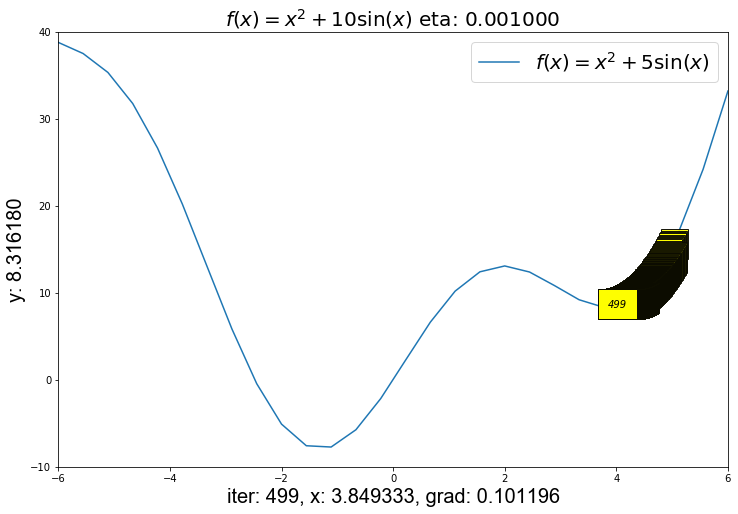

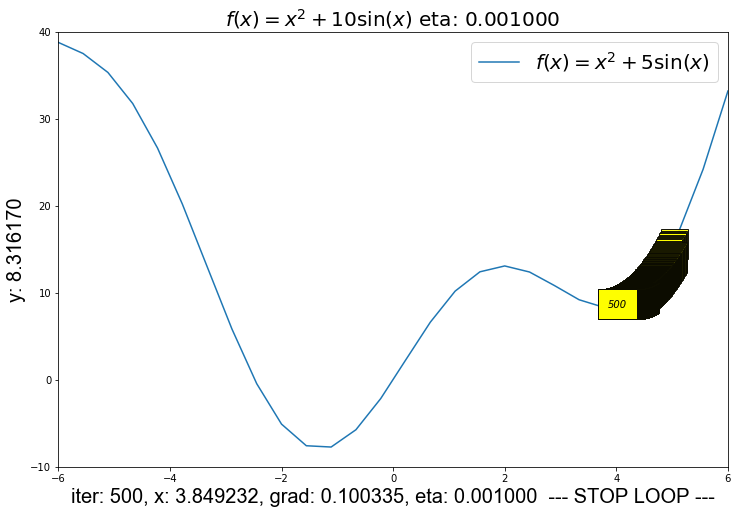

In [6]:
(x_, i_) = GD_Graph(eta=.001, x0=5, N=1000)

### Learning rate

The ** speed of convergence ** of GD does not only depend on the **start point but also** on the **learning rate **

* EX1: $x_{0} = -5, \eta = 0.01$

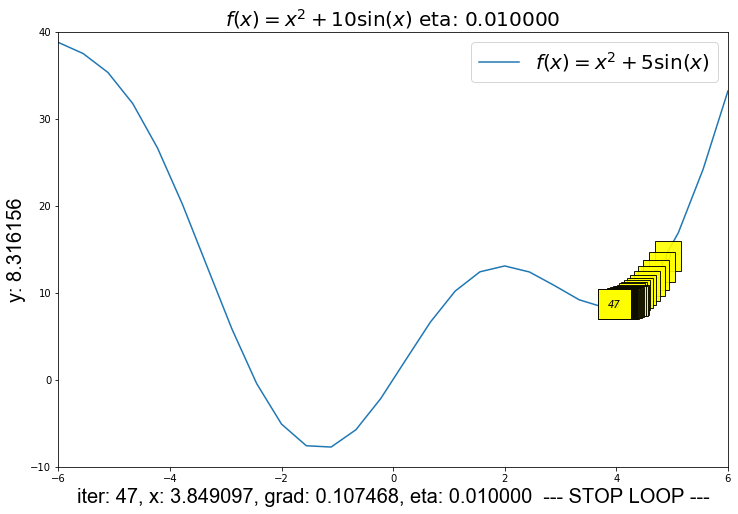

In [7]:
(x_, i_) = GD_Graph(eta=0.01, x0=5) 

* EX2: $x_{0} = -5, ~ \eta = 0.5$

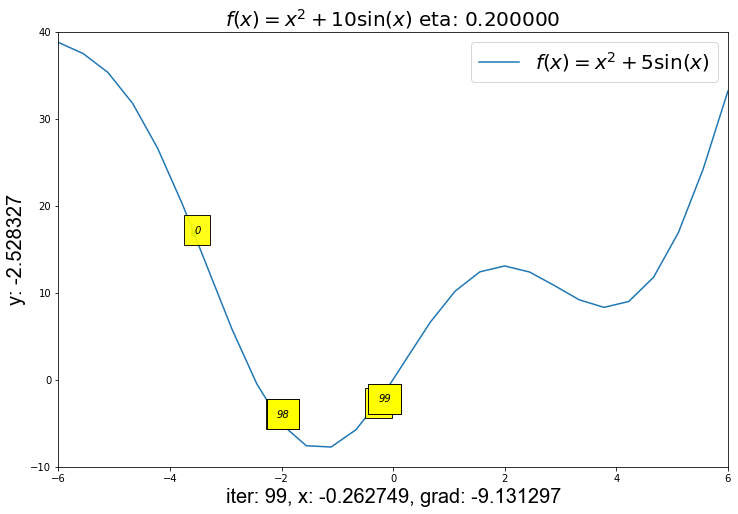

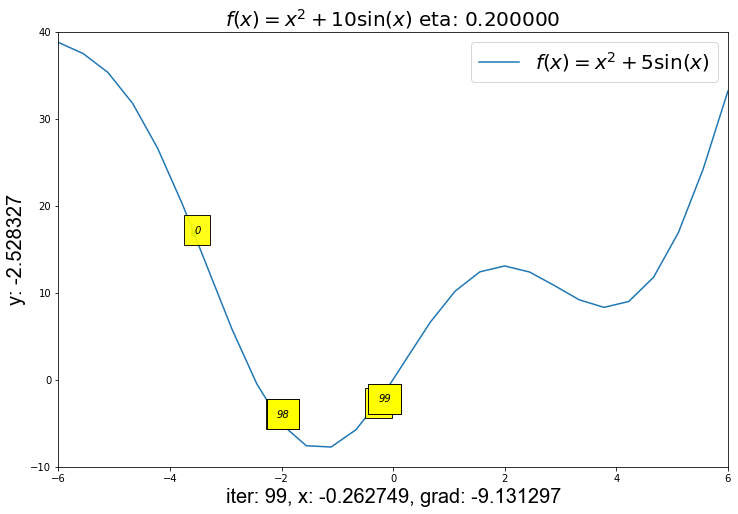

In [8]:
(x_, i_) =  GD_Graph(eta=0.2, x0=-5) 

## Gradient Descent with multiple variants

Assume we find minimum of $f(\mathbf{\theta})~,~\mathbf{\theta}~is~a~vector$

\begin{align}
\Large \nabla_{\theta}f(\theta) & = \Large f'(\theta) \\
\Large \theta_{t+1} & = \Large \theta_{t} - \eta \nabla_{\theta} f(\theta_{t}) \\
\end{align}

**Simple form:**
$$\Large \theta  =  \theta - \eta \nabla_{\theta} f(\theta)$$

With **linear regression** the lost function is:

$$\Large \mathcal{L}(\mathbf{w}) = \frac{1}{2N}||\mathbf{y - \bar{X}w}||_2^2 ~~~~~(0)$$

Gradient of lost function

$$\Large \nabla_{\mathbf{w}}\mathcal{L}(\mathbf{w}) = 
\frac{1}{N}\mathbf{\bar{X}}^T \mathbf{(\bar{X}w - y)} ~~~~~(1)$$

### Gradient

$$\Large f’(x) = \lim_{\varepsilon \rightarrow 0}\frac{f(x + \varepsilon) - f(x)}{\varepsilon}$$

#### Calculate gradient with ** Numerical Gradient **

$$\Large f’(x) \approx \frac{f(x + \varepsilon) - f(x - \varepsilon)}{2\varepsilon} ~~~~ (2)$$

$$\Large \varepsilon: ~ is ~very ~small $$
** Why use gradient both side? Why do not use grandient left of right? **

* ** Explain by geometry **

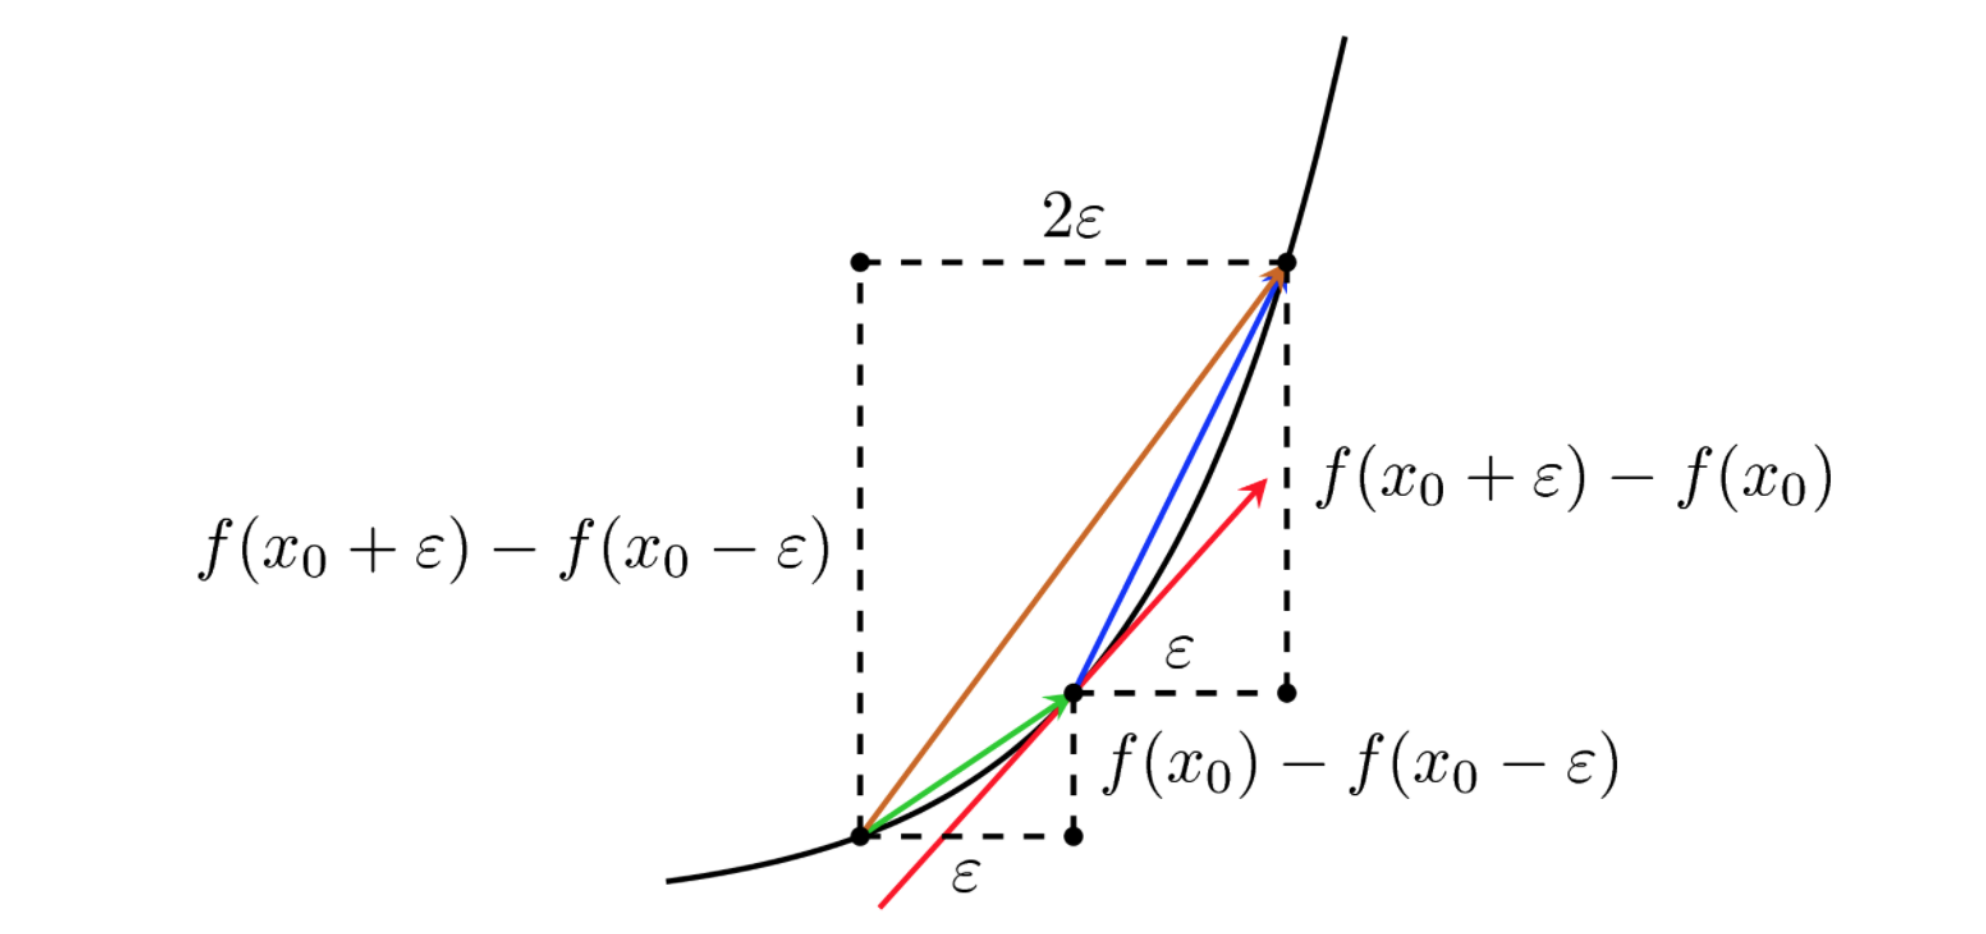

## Example

In [9]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(2)

**Recall (Linear Regression):**
$$\large \mathbf{w}^T\mathbf{x} = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 + ... + w_N x_N  = y$$
$$\large  \mathbf{w} = (\mathbf{\bar{X}}^T\mathbf{\bar{X}})^{\dagger} \mathbf{\bar{X}}^T\mathbf{y} = \mathbf{A}^{\dagger}\mathbf{b} 
~~~ $$

**Where: **

$$\large \mathbf{A} \triangleq \mathbf{\bar{X}}^T\mathbf{\bar{X}} $$ 
$$\large \mathbf{\bar{X}}^T\mathbf{y} \triangleq \mathbf{b}$$

In [10]:
plt.figure(figsize=(12, 8))

X = np.random.rand(1000, 1) # Number of data set
y = 4 + 3 * X + .2 * np.random.randn(X.shape[0], 1) # noise added

# Building Xbar 
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w = np.dot(np.linalg.pinv(A), b)
print('Solution found by formula: w = ',w.T)

# Display result
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(0, 1, 2, endpoint=True)
y0 = w_0 + w_1*x0

# Draw the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 
plt.plot(x0, y0, 'y', linewidth = 5)   # the fitting line
plt.axis([0, 1, 0, 10])
plt.show()

Solution found by formula: w =  [[ 4.0071715   2.98225924]]


** Calculate Xbar: **

In [11]:
def CalXbar(X):
    one = np.ones((X.shape[0],1))
    return np.concatenate((one, X), axis = 1)
    

** Lost (Cost) function: **
 $$\large \mathcal{L}(\mathbf{w}) = \frac{1}{2N}||\mathbf{y - \bar{X}w}||_2^2 $$

In [12]:
def cost(Xbar, w): 
    N = Xbar.shape[0]
    return 1/(2*N) * np.linalg.norm(y - Xbar.dot(w), 2)**2

    

** Gradient function: **
$$\large \nabla_{\mathbf{w}}\mathcal{L}(\mathbf{w}) = 
\frac{1}{N}\mathbf{\bar{X}}^T \mathbf{(\bar{X}w - y)} $$

In [13]:
def grad(Xbar, w): 
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

** Numerical grad function: **
$$\large f’(x) \approx \frac{f(x + \varepsilon) - f(x - \varepsilon)}{2\varepsilon} $$

In [14]:
def numerical_grad(Xbar, w, cost):
    eps = 1e-4
    g = np.zeros_like(w) #Return an array of zeros with the same shape and type as a given array.
    for i in range(len(w)):
        w_p = w.copy()
        w_n = w.copy()
        w_p[i] += eps # positive
        w_n[i] -= eps # negative
        g[i] = (cost(Xbar, w_p) - cost(Xbar, w_n))/(2*eps)
    return g 

** Compare Grad &  Numerical grad function **

In [15]:
import numpy as np

def check_grad(Xbar, w, cost, grad):
    w = np.random.rand(w.shape[0], w.shape[1])
    grad1 = grad(Xbar, w)
    grad2 = numerical_grad(Xbar, w, cost)
    return True if np.linalg.norm(grad1 - grad2) < 1e-6 else False 

w = np.random.rand(2, 1)

print( 'Checking gradient...', check_grad(Xbar, w, cost, grad))

Checking gradient... True


## Gradient Descent  Demo

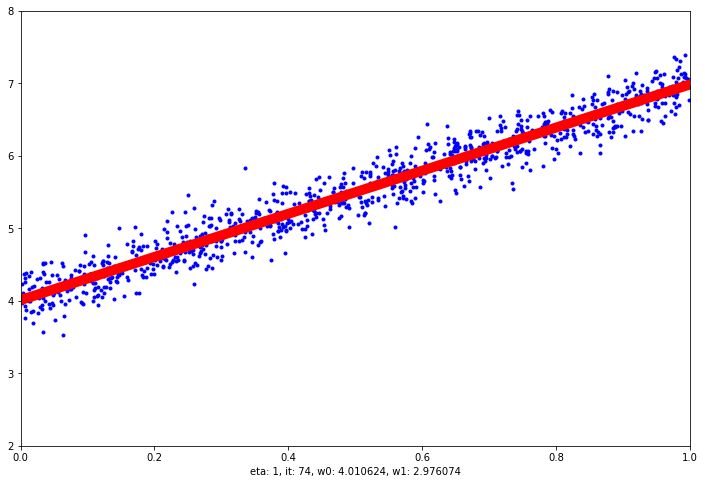

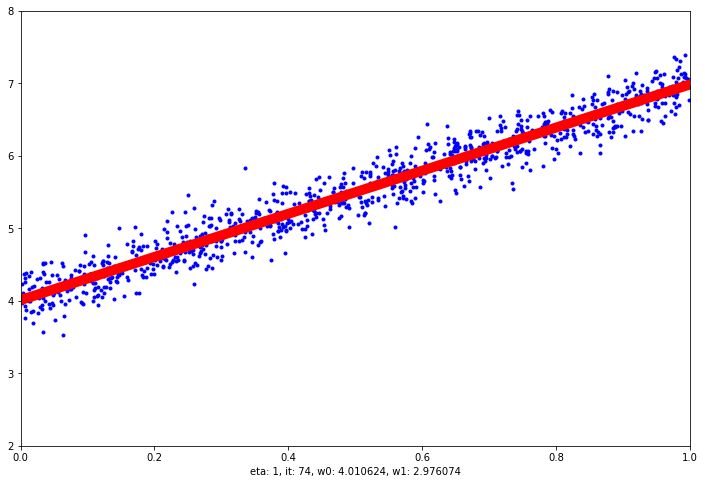

In [16]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import time
import pylab as pl
from IPython import display


def CalXbar(X):
    one = np.ones((X.shape[0],1))
    return np.concatenate((one, X), axis = 1)

def grad(xbar, w, y): 
    N = xbar.shape[0]
    return 1/N * xbar.T.dot(xbar.dot(w) - y)


fig = plt.figure(figsize=(12, 8))
X = np.random.rand(1000, 1)
y = 3 * X +  4 +   .2 * np.random.randn(1000, 1) # noise added

# Draw the fitting line 
plt.plot(X.T, y.T, 'b.')     # data 

# calculate GD
w_init = np.array([[2], [1]])
w = [w_init]

eta = 1.5
xbar = CalXbar(X)

for it in range(100):
    plt.cla()
    g = grad(xbar, w[-1], y)
    w_new = w[-1] - eta * g
    
    #draw line
    xt = [0, 1]
    plt.plot(X.T, y.T, 'b.')     # data 
    yt = w_new[0] + w_new[1] * xt
    
    plt.plot(xt, yt, 'r-', lw=10) 
    plt.xlabel('eta: %d, it: %d, w0: %f, w1: %f' %(eta, it, w_new[0], w_new[1]))
    plt.axis([0, 1, 2, 8])
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(.1)
    
    if np.linalg.norm(grad(xbar, w_new, y))/len(w_new) < 1e-3:
        break 
    w.append(w_new)



** Level sets - Đường đồng mức **

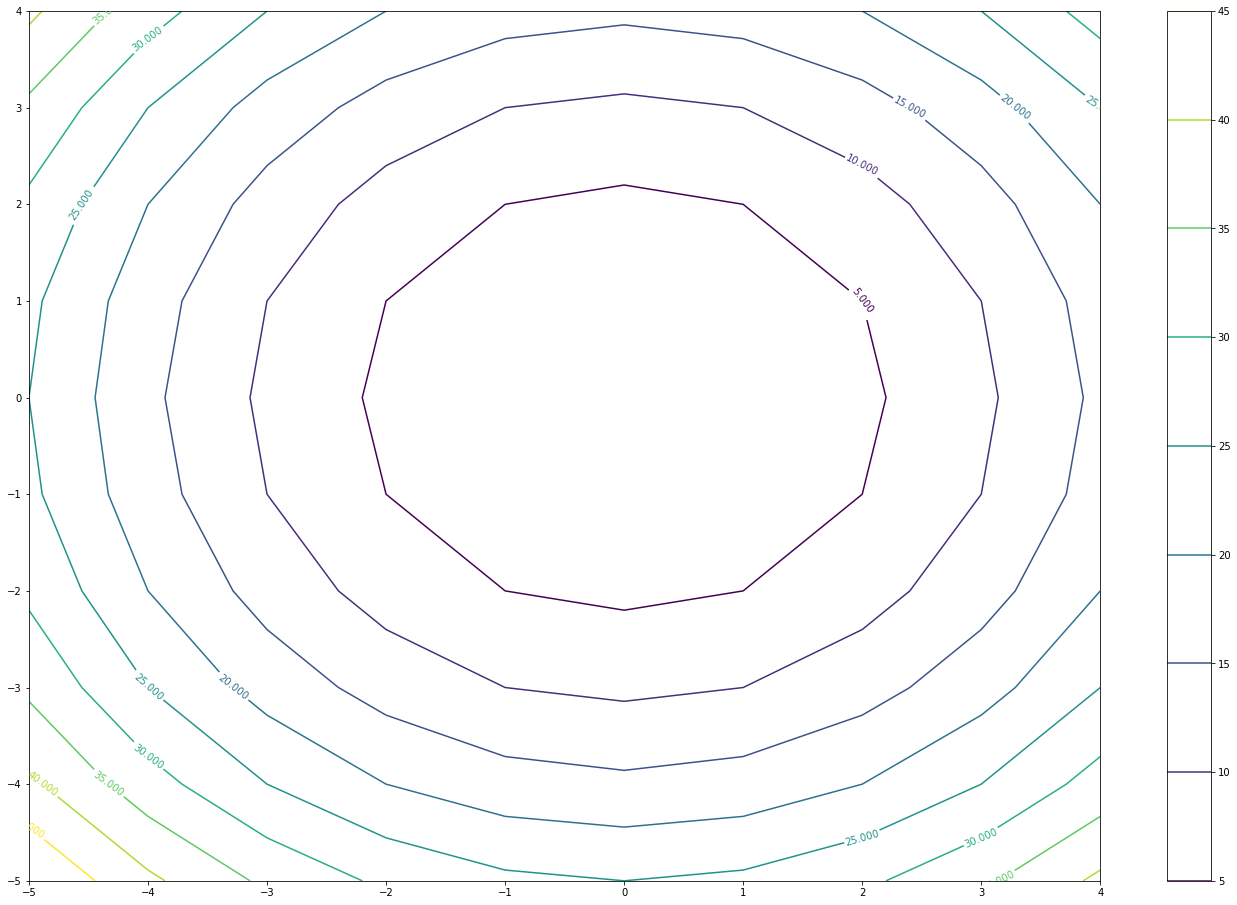

In [17]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import time
import pylab as pl
from IPython import display
 
def f(x,y):
    #return np.minimum(np.minimum(np.minimum(x,x-y),x**2),y+1)
    return x**2 + y**2

plt.figure(figsize=(24, 16))

x_ = np.arange(-5,5,1)
y_ = np.arange(-5,5,1)

x,y = np.meshgrid(x_, y_)

levels = f(x, y)

c = plt.contour(x, y, levels, 10)
manual_locations = zip(x_,y_)
print (manual_locations)
plt.clabel(c, inline=1, fontsize=10)
plt.colorbar()

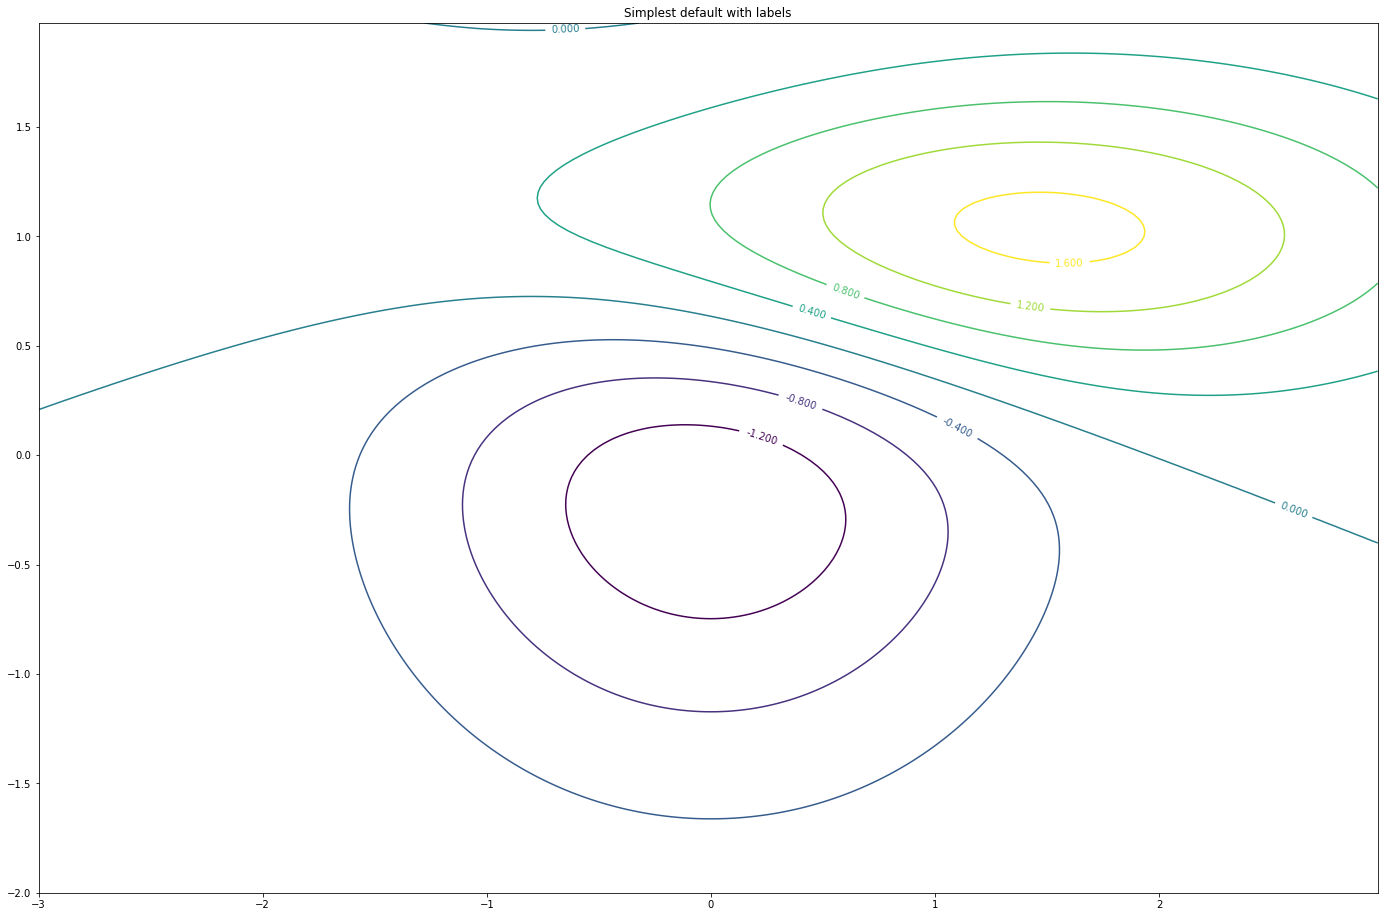

In [18]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)
plt.figure(figsize=(24, 16))
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')


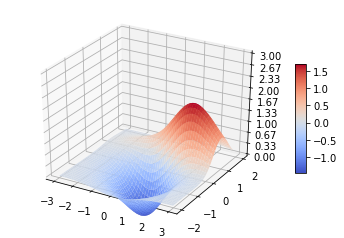

In [19]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.mlab as mlab

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data
X = np.arange(-6, 6, .1)
Y = np.arange(-6, 6, .1)
XX, YY = np.meshgrid(X, Y)
R = np.sqrt(XX**2 + YY**2)

#ZZ = np.sin(R)
ZZ = XX**2 + YY**2

#ZZ = (XX**2 + YY - 7)**2 + (XX - YY + 1) **2

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
XX, YY = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(XX, YY, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(XX, YY, 1.5, 0.5, 1, 1)
# difference of Gaussians
ZZ = 10.0 * (Z2 - Z1)


# Plot the surface.
surf = ax.plot_surface(XX, YY, ZZ, cmap=cm.coolwarm, linewidth=0, antialiased=True)

# Customize the z axis.
ax.set_zlim(0, 3)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=.5, aspect=10)

plt.show()

# Feature Scaling

We can speed up gradient descent by having each of our input values in roughly the same range. This is because $w$ will descend quickly on small ranges and slowly on large ranges,

The way to prevent this is to modify the ranges of our input variables so that they are all roughly the same. Ideally:

$−1 ≤ x(i) ≤ 1$

or

$−0.5 ≤ x(i) ≤ 0.5$

Two techniques to help with this are **feature scaling** and **mean normalization.**

* **Feature scaling**

 $$x_i := \dfrac{x_i}{s_i}$$
 
 $s_i$ is the range of values (max - min)

* **Mean normalization**

$$x_i := \dfrac{x_i - \mu_i}{s_i}$$

Where 

 $$\mu_i ~ is ~ the ~ average ~ of ~ all ~ the ~ values ~ for ~ feature ~ (i)$$


# Notes

## Standard deviation 
refer to http://www.mathsisfun.com/data/standard-deviation.html

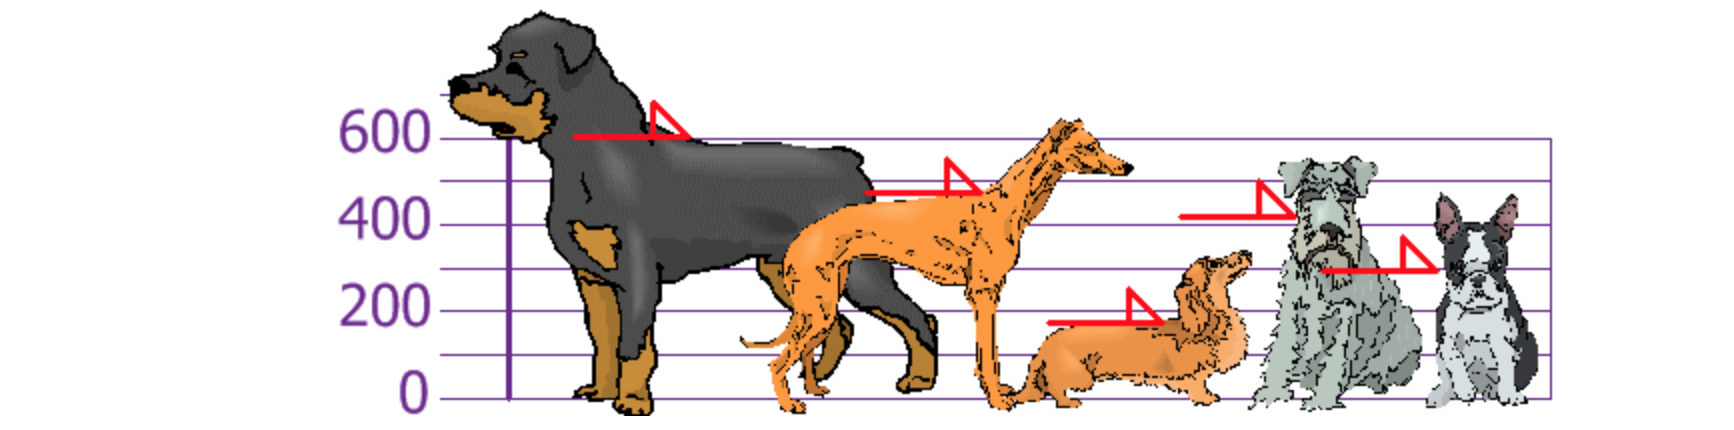

** Mean **

$$Mean  =   \frac {600 + 470 + 170 + 430 + 3005} {5}   =   \frac{1970}{5}   =  394$$



** Variance **


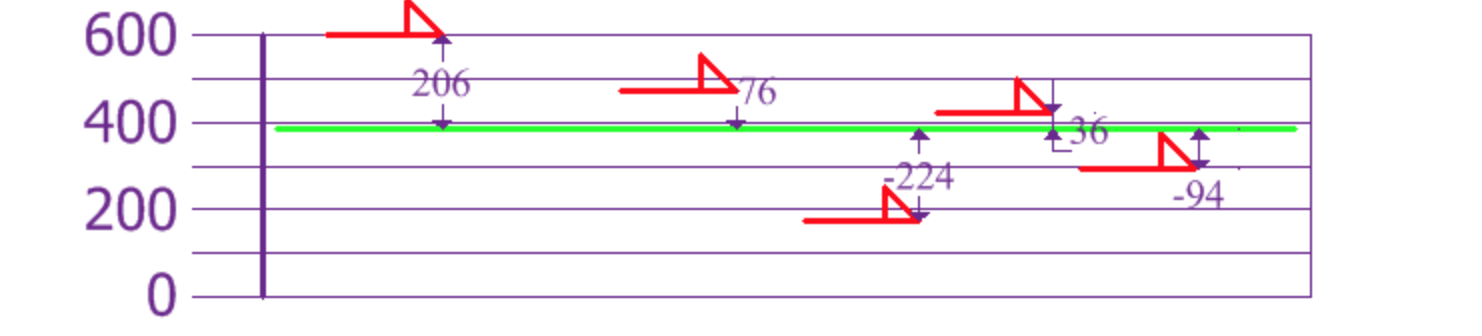

$$ \sigma^2 = \frac {206^2 + 76^2 + (-224)^2 + 36^2 + (-94)^2}{5} = 21,704$$

In [20]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

N = 2

# X = np.random.rand(N, 1)
# y = 3 * X +  4 +   .2 * np.random.randn(N, 1) # noise added

X = np.array([[1], [2]])

y = 2 * X 

def Xbar(X):
    one = np.ones((X.shape[0],1))
    return np.concatenate((one, X), axis = 1)

def cost(xbar,y, w): 
    N = xbar.shape[0]
    return .5/N * np.linalg.norm(y - xbar.dot(w), 2)**2

xbar = Xbar(X)

w1 = [0, 1, 3, 4, 5, 6, 7, 8, 9]
w2 = [0, 1, 3, 4, 5, 6, 7, 8, 9]


w = list(zip(w1, w2)) #In python 3.0 zip returns a zip object. You can get a list out of it by calling list(zip(a, b))

f1 = [cost(xbar, y.T, np.array(w1).T) for w3 in w]



import plotly.plotly #as py
from plotly.graph_objs import *
import numpy as np

# py.iplot([
#     dict(z=f, type='surface')],
#     filename='multiple-surfaces')


plotly.tools.set_credentials_file(username='agentoo7', api_key='opb1mZimgsqwncFDMYaC')

surface = Surface(x=w1, y=w2, z=f)
data = Data([surface])

layout = Layout(
    title='Parametric Plot',
    scene=Scene(
        xaxis=XAxis(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=YAxis(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=ZAxis(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='parametric_plot')





ValueError: shapes (2,2) and (9,) not aligned: 2 (dim 1) != 9 (dim 0)

In [ ]:
delta = .1
x = np.arange(-6.0, 5.0, delta)
y = np.arange(-20.0, 15.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)

Z = X**2 + Y**2

Z = (X**2 + Y - 7)**2  + (X - Y + 1)**2


# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label


plt.figure(figsize=(16,10))



levels = np.arange(-10, 200, 10)

#CS = plt.contour(X, Y, Z)

# CS = plt.contour(Z, levels,
#                  origin='lower',
#                  linewidths=2,
#                  extent=(-3, 3, -2, 2))

CS = plt.contour(X, Y, Z, levels,
                 origin='lower',
                 linewidths=2)

plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')



plt.show()


In [ ]:
import numpy as np
import plotly
import plotly.plotly as py
from plotly.graph_objs import *

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

plt.figure(figsize=(16,10))
fig = plt.figure()

debug = False
N = 10
X = np.random.rand(N, 1)
y = 4 + 3 * X + .2 * np.random.randn(N, 1) # noise added

one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis = 1)

w1 = np.reshape(np.arange(-10, 10, 1), (20,1))
w2 = np.reshape(np.arange(-10, 10, 1), (20,1))
w = np.concatenate((w1, w2), axis = 1)

def cost(Xbar, w): 
    N = Xbar.shape[0]
    return .5/N * np.linalg.norm(y - Xbar.dot(w), 2)**2

def grad(Xbar, w): 
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

if debug:
    print ("X", X)
    print("y", y)
    print ("Xbar", Xbar)
    print("w1:", w1)
    print("w2:", w2)
    print ("w", w)



ax = fig.gca(projection='3d')

ww1, ww2 = np.meshgrid(w1, w2)

ww = np.concatenate((ww1, ww2), axis = 1)
if debug:
    print ("ww1", ww1)
    print ("ww2", ww2)
    print ("ww", ww)

www1 = np.reshape(ww1, (ww1.size,1))
www2 = np.reshape(ww2, (ww2.size,1))
www = np.concatenate((www1, www2), axis = 1)

if debug:
    print ("www1", www1)
    print ("www2", www2)
    print ("www", www)

#print ("www[0]", grad(Xbar, www[1]))


www3 = [cost(Xbar, w) for w in www]

ww3 = np.reshape(www3, ww1.shape)
if debug:
    print("w[0]", cost(Xbar, w[0]))
    print("www[0]", cost(Xbar, www[0]))
    print ("www3", www3)
    print ("ww3", ww3)


# Plot the surface.
surf = ax.plot_surface(ww1, ww2, ww3, cmap=cm.coolwarm, linewidth=0, antialiased=True)

# Customize the z axis.
#ax.set_zlim(0, 1000)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=.5, aspect=5)

plt.show()


levels = np.arange(-10, 10, 2)



CS = plt.contour(ww1, ww2, ww3, levels,
                 origin='lower',
                 linewidths=2)

plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')



plt.show()


plotly.tools.set_credentials_file(username='agentoo7', api_key='opb1mZimgsqwncFDMYaC')

surface = Surface(x=ww1, y=ww2, z=ww3)
data = Data([surface])

layout = Layout(
    title='Parametric Plot',
    scene=Scene(
        xaxis=XAxis(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=YAxis(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=ZAxis(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='parametric_plot')





